# 0419 TA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[8794]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 134,
        253, 255, 253, 253, 213,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

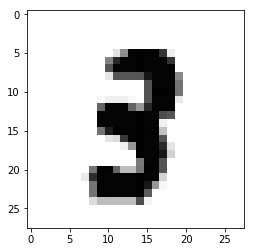

In [7]:
plt.imshow(x_train[8794], cmap="Greys")

In [8]:
y_train[8794]

3

In [9]:
x_train[8794].shape

(28, 28)

In [10]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [11]:
x_train[8794].shape

(784,)

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train, 10)

In [14]:
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import  SGD

In [17]:
model_1 = Sequential()

In [18]:
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation("sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model_1.add(Dense(2))
model_1.add(Activation("sigmoid"))

In [20]:
model_1.add(Dense(10))
model_1.add(Activation("softmax"))

In [21]:
model_1.compile(loss = 'mse', 
              optimizer = SGD(lr=0.087),
              metrics = ["accuracy"])

In [22]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_1_20 = model_1.fit(x_train, y_train, 
          batch_size=100, 
          epochs=20, 
          verbose=1, 
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0898 - acc: 0.1164 - val_loss: 0.0895 - val_acc: 0.1485
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0893 - acc: 0.1589 - val_loss: 0.0891 - val_acc: 0.1694
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0889 - acc: 0.1734 - val_loss: 0.0888 - val_acc: 0.1844
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0887 - acc: 0.1841 - val_loss: 0.0886 - val_acc: 0.1932
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0884 - acc: 0.1901 - val_loss: 0.0883 - val_acc: 0.1942
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0882 - acc: 0.1919 - val_loss: 0.0881 - val_acc: 0.1965
Epoch 7/20
60000/60000 [==============================] - 1s 14us/step - loss: 0

In [24]:
from ipywidgets import interact_manual

In [25]:
predict = model_1.predict_classes(x_test)

In [26]:
model_1.predict(x_test)[0]

array([0.06721351, 0.08616418, 0.07631227, 0.13499515, 0.07915573,
       0.12421583, 0.08020673, 0.1414505 , 0.08558533, 0.12470084],
      dtype=float32)

In [27]:
def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[num])

In [28]:
interact_manual(test, num =(0,9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test(num)>

In [29]:
score = model_1.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 21us/step


In [30]:
score

[0.08527673655748368, 0.2085]

In [31]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.08527673655748368
測試資料正確率: 0.2085


In [32]:
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [33]:
x_train_1.max()

1.0

In [34]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [35]:
x_train_2.max()

1.0

In [36]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = SGD(lr=0.05),
              metrics = ["accuracy"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0908 - acc: 0.0974 - val_loss: 0.0907 - val_acc: 0.0982
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0906 - acc: 0.0974 - val_loss: 0.0905 - val_acc: 0.0982
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0904 - acc: 0.0974 - val_loss: 0.0904 - val_acc: 0.0982
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0903 - acc: 0.0974 - val_loss: 0.0903 - val_acc: 0.0982
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0902 - acc: 0.0974 - val_loss: 0.0902 - val_acc: 0.0984
Epoch 6/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0901 - acc: 0.0979 - val_loss: 0.0901 - val_acc: 0.0990
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0901 - acc: 0.1003 - val_loss: 0.0900 - val_acc

In [38]:
plt.plot(model_1_10.history["acc"])
plt.plot(model_2_20.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()

NameError: name 'model_1_10' is not defined

In [39]:
plt.plot(model_1_10.history["val_loss"])
plt.plot(model_2_20.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()

NameError: name 'model_1_10' is not defined

### Activation function

### 可參考keras檔案：https://keras.io/activations/
### 或是維基百科：https://en.wikipedia.org/wiki/Activation_function

### softmax
${\displaystyle f_{i}({\vec {x}})={\frac {e^{x_{i}}}{\sum _{j=1}^{J}e^{x_{j}}}}}$

Range : $(0,1)$

可以將輸出值轉換成像是機率分佈，全部輸出加起來等於1

### tanh
${\displaystyle f(x)=\tanh(x)={\frac {(e^{x}-e^{-x})}{(e^{x}+e^{-x})}}}$

Range : $(-1,1)$



In [40]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [41]:
x = np.linspace(-10, 10, 200)

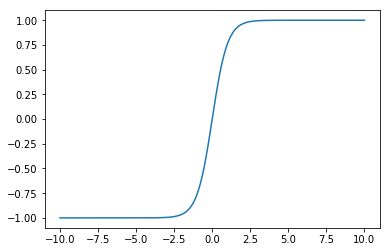

In [42]:
plt.plot(x, tanh(x))

### sigmoid
${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$

Range : $(0,1)$



In [43]:
def sigmoid(x):
    return 1.0 /(1.0 + np.exp(-x))

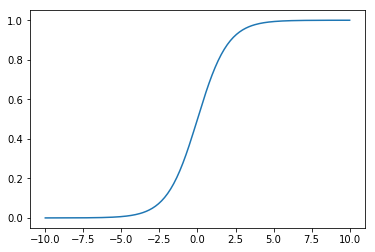

In [44]:
plt.plot(x, sigmoid(x))

### elu
${\displaystyle f(\alpha ,x)={\begin{cases}\alpha (e^{x}-1)&{\text{for }}x\leq 0\\x&{\text{for }}x>0\end{cases}}}$

Range : ${\displaystyle (-\alpha ,\infty )}$



In [45]:
def elu(x, a):
    y = x.copy()
    for i in range(len(y)):
        if y[i]<0:
            y[i] = a * (np.exp(y[i])-1)
    return y

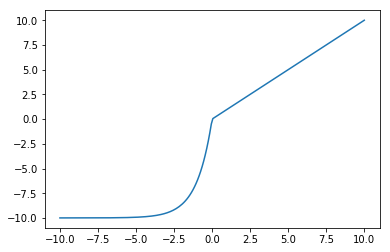

In [46]:
plt.plot(x,elu(x,10))

### relu
${\displaystyle f(x)={\begin{cases}0&{\text{for }}x<0\\x&{\text{for }}x\geq 0\end{cases}}}$

Range : $[0,\infty )$




In [47]:
def relu(x):
    y = x.copy()
    y[y < 0] = 0
    return y

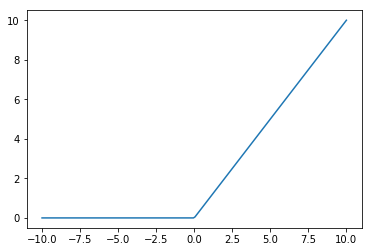

In [48]:
plt.plot(x,relu(x))

### selu
${\displaystyle f(\alpha ,x)=\lambda {\begin{cases}\alpha (e^{x}-1)&{\text{for }}x<0\\x&{\text{for }}x\geq 0\end{cases}}}
with {\displaystyle \lambda =1.0507} and {\displaystyle \alpha =1.67326}$

Range : ${\displaystyle (-\lambda \alpha ,\infty )}$



- ### softplus

- ### softsign

- ### hard_sigmoid

- ### linear

### Loss Funciton

### 可參考keras檔案：https://keras.io/losses/

### mean_squared_error

${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}}$

In [49]:
def mse(true, pred):
    a = 0
    for i in range(len(true)):
        a += (true - pred)**2
    return a / len(true)

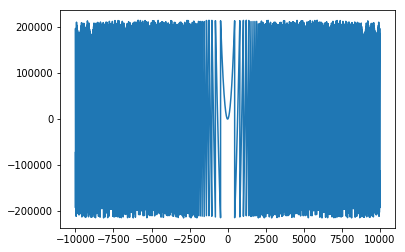

In [50]:
target = np.repeat(0, 10000) 
pred = np.arange(-10000,10000, 2)
plt.plot(pred, mse(target, pred))

### mean_absolute_error

${\displaystyle \mathrm {MAE} ={\frac {1}{n}{\sum _{i=1}^{n}\left|Y_{i}-{\hat {Y_{i}}}\right|}}}$

In [51]:
def mae(true, pred):
    a = 0
    for i in range(len(true)):
        a += np.abs((true - pred))
    return a / len(true)

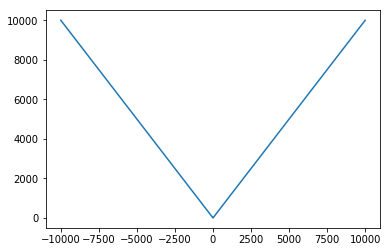

In [52]:
plt.plot(pred, mae(target, pred))

### binary_crossentropy

${\displaystyle \mathrm -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {\hat {y}}_{n}+(1-y_{n})\log(1-{\hat {y}}_{n}){\bigg ]}}$

### categorical_crossentropy

${\displaystyle \mathrm -{\frac  {1}{N}}\sum _{{i=1}}^{N}\sum _{{c=1}}^{C}{1_{y_i \in C_c}}\log p_{model}[y_i \in C_c]}$

##### 可參考此篇討論：https://github.com/keras-team/keras/issues/6444

- ### mean_absolute_percentage_error

- ### mean_squared_logarithmic_error

- ### squared_hinge

- ### hinge

- ### sparse_categorical_crossentrop

- ### kullback_leibler_divergence

- ### poisson

- ### cosine_proximity

### Optimizer

### 可參考keras檔案：https://keras.io/optimizers/

- ### SGD
- ### RMSprop
- ### Adagrad
- ### Adadelta
- ### Adam
- ### Adamax
- ### Nadam